In [1]:
    # 0. ライブラリをインストールする
    import numpy as np
    import pandas as pd
    import itertools

    from scipy import stats
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error
    
    #multiple anava analyis
    from statsmodels.multivariate.manova import MANOVA


    import matplotlib.pyplot as plt
    import japanize_matplotlib
    # https://yolo.love/matplotlib/japanese/

    %matplotlib inline 
    import seaborn as sns
    plt.style.use("ggplot")

    import matplotlib
    import os
    
    from tqdm import tnrange, tqdm_notebook

In [2]:
# 課題１． まず、指標選定の証明：回帰分析
# ①ﾃﾞｰﾀ読み込み

In [3]:
# 文系：lib 理系：sc
lib=pd.read_csv("C:/Users/1181767/Desktop/jupyter_data/20200722_lib.csv",encoding="cp932")
sc=pd.read_csv("C:/Users/1181767/Desktop/jupyter_data/20200722_sc.csv",encoding="cp932")

In [4]:
# ②データ前処理

<Figure size 432x288 with 0 Axes>

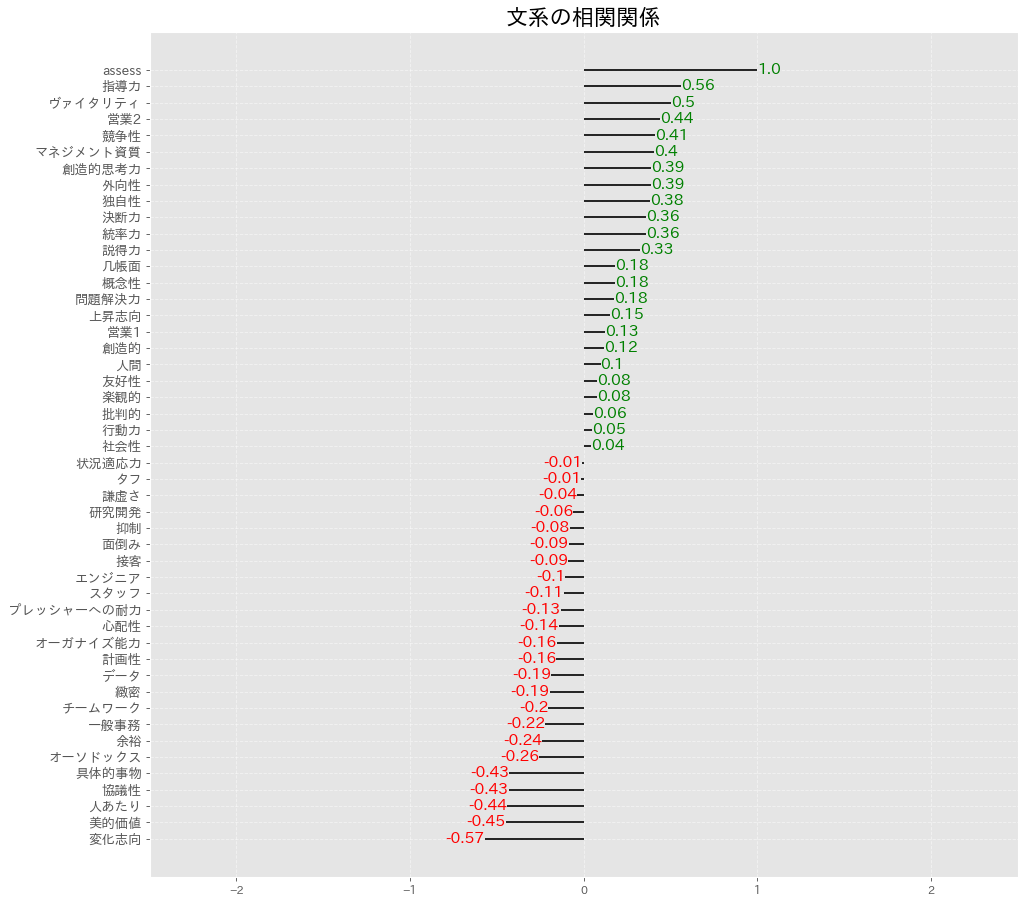

In [6]:
# 相関関係見える化：文系全体
corrlib=libcorr.loc[:, ['assess']]
corrlib['colors'] = ['red' if x < 0 else 'green' for x in corrlib["assess"]]
corrlib.sort_values("assess", inplace=True)
#Draw plot
fig=plt.figure()
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=corrlib.index, xmin=0, xmax=corrlib.assess)
for x, y, tex in zip(corrlib.assess, corrlib.index, corrlib.assess):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations  
plt.title('文系の相関関係', fontdict={'size':20})
plt.yticks(corrlib.index, corrlib.index, fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

In [ ]:
# # --------------------------データ分析---------------------------------------------

In [ ]:
# 0. Anova分析

In [14]:
# sc1 のAnova分析
names="+".join(sc1.columns[1:])
maov = MANOVA.from_formula(names+"~assess", data=sc1)
print(maov.mv_test())

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value    Num DF  Den DF  F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda   0.0010 47.0000 86.0000 1768.5333 0.0000
         Pillai's trace   0.9990 47.0000 86.0000 1768.5333 0.0000
 Hotelling-Lawley trace 966.5240 47.0000 86.0000 1768.5333 0.0000
    Roy's greatest root 966.5240 47.0000 86.0000 1768.5333 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
             assess         Value   Num DF  Den DF F Value Pr > F
-----------------------------------------------------------------
              Wilks' lambda 0.6402 47.0000 86.0000  1.0284 0.4466
             Pillai's trace 0.

In [10]:
# 理系7つ：回帰ols
# sc7=sc1[["assess",'営業1', '営業2', 'スタッフ',
#        '一般事務', 'エンジニア', '研究開発', '接客']]
sc7_d=sc7.drop(columns=["研究開発","エンジニア","スタッフ","接客","営業1"])
names="+".join(sc7_d.columns[1:])
model_sc7=smf.ols(formula="assess~"+names,data=sc7_d)

result_sc7=model_sc7.fit()
display(result_sc7.summary())
print("AIC=",result_sc7.aic)
display(sc7_d.columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 assess   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.635
Date:                Fri, 14 Aug 2020   Prob (F-statistic):             0.0755
Time:                        11:00:07   Log-Likelihood:                -95.075
No. Observations:                 134   AIC:                             196.2
Df Residuals:                     131   BIC:                             204.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3606      0.335      4.061      0.000       0.698       2.023
営業2            0.0643      0.028      2.290      0.024       0.009       0.120
一般事務           0.0496      0.031      1.582      0.116      -0.012       0.112
==============================================================================
Omnibus:                        3.186   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                3.446
Skew:                           0.046   Prob(JB):                        0.178
Kurtosis:                       3.780   Cond. No.                         69.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC= 196.150041081421


Index(['assess', '営業2', '一般事務'], dtype='object')

In [10]:
# # OLS:Forward Selection for computing->choose min AIC
# 7つの職業特性
X7 = sc7.drop(columns = 'assess', axis = 1)
k = len(X7.columns)
NAMES=[]
features=[]
AIC=[]

for i in range(1,k+1):
    remaining_features = list(X7.columns.values)
    for combo in itertools.combinations(remaining_features,i):
        names="+".join(combo)
        model=smf.ols(formula="assess~"+names,data=sc7)
        result=model.fit()
        aic=result.aic
        
        NAMES.append(names)
        features.append(list(combo))
        AIC.append(aic)
dfs7 = pd.DataFrame({'features':features,"NAMES":NAMES,'AIC':AIC})
dfs7_min=dfs7[dfs7["AIC"]==min(dfs7["AIC"])]

# create:est datatable 
names7=dfs7_min.NAMES.values[0]
model7=smf.ols(formula="assess~"+names7,data=sc7)
result7=model7.fit()

est7=np.exp(result7.params)
estp7=100*(est7-1).round(2)
ci7=np.exp(result7.conf_int())
Pv7=result7.pvalues
Name7=est7.index.values


dfest7=pd.DataFrame({"Name":Name7,"est":est7,"estp":estp7,"LCL":ci7[0],"UCL":ci7[1],"Pv":Pv7})
dfest7_0=dfest7[dfest7.Pv<0.05].iloc[1:,:]
dfest7_0.reset_index(drop=True, inplace=True)
dfest7_h=dfest7_0[dfest7_0.est>=1]
dfest7_l=dfest7_0[dfest7_0.est<1]

display(dfest7_h)
display(dfest7_l)

,Name,est,estp,LCL,UCL,Pv
0,営業2,1.066376,7.0,1.008795,1.127245,0.023603


,Name,est,estp,LCL,UCL,Pv
